In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [23]:
data = pd.read_csv('SoccerData/mls.csv')

In [24]:
data.head()

,Date,Season,home,visitor,FT,hgoal,vgoal,hconf,vconf,totgoal,round,leg,hgoalaet,vgoalaet,hpen,vpen
0,1996-04-06,1996,San Jose Earthquakes,DC United,1-0,1,0,West,East,1,regular,NaN,NaN,NaN,NaN,NaN
1,1996-04-13,1996,LA Galaxy,New York Red Bulls,2-1,2,1,West,East,3,regular,NaN,NaN,NaN,NaN,NaN
2,1996-04-13,1996,Tampa Bay Mutiny,New England Revolution,3-2,3,2,East,East,5,regular,NaN,NaN,NaN,NaN,NaN
3,1996-04-13,1996,Columbus Crew,DC United,4-0,4,0,East,East,4,regular,NaN,NaN,NaN,NaN,NaN
4,1996-04-13,1996,Sporting Kansas City,Colorado Rapids,3-0,3,0,West,West,3,regular,NaN,NaN,NaN,NaN,NaN


In [25]:
data2015 = data[data['Season']==2015]

In [26]:
data2015 = data2015[data2015['round']=='regular']

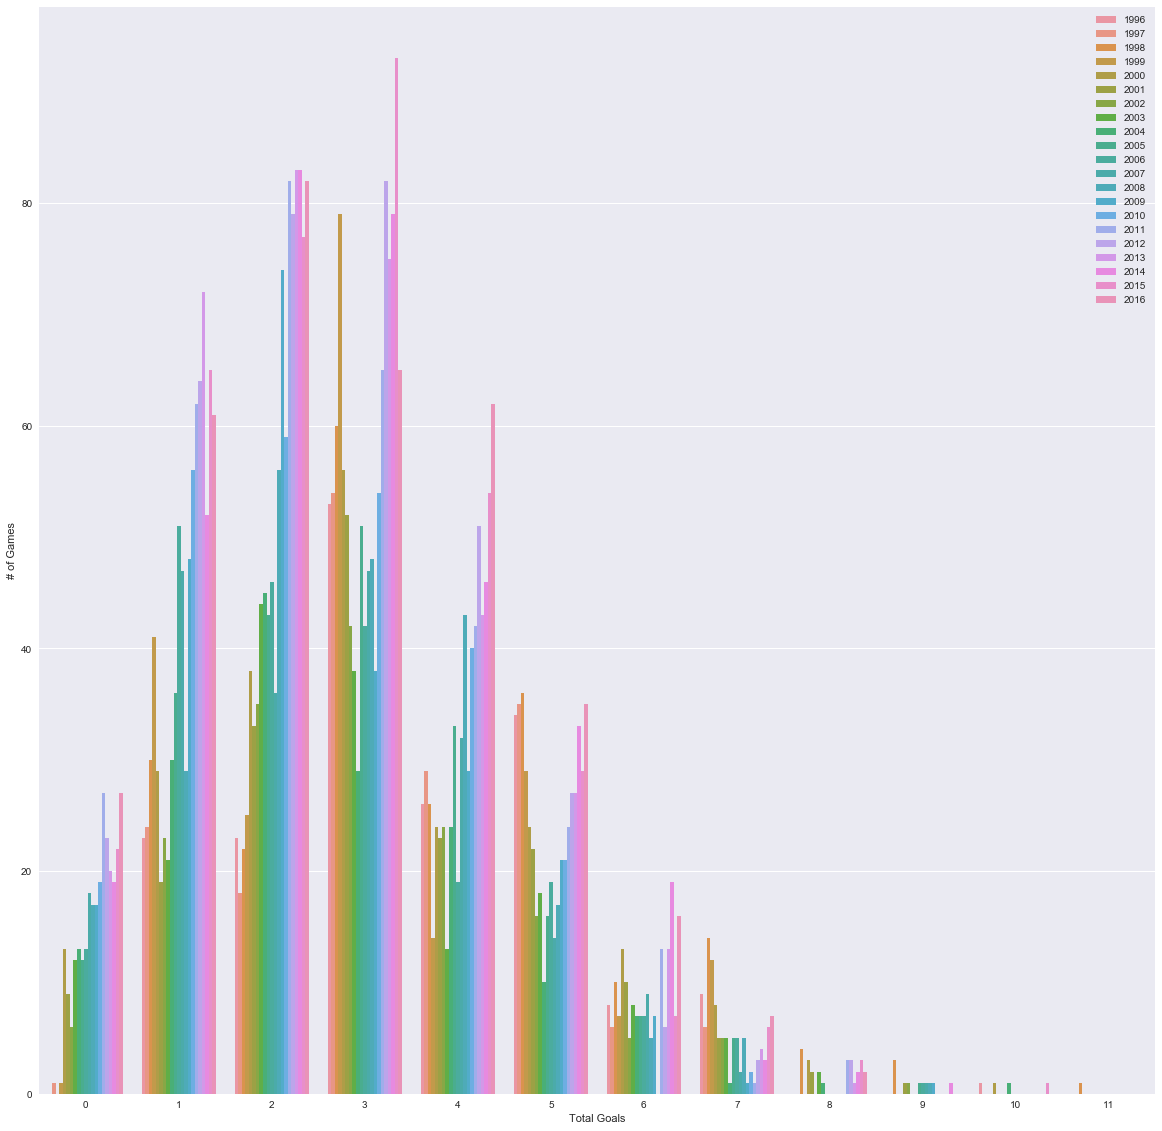

In [27]:
sns.set()
_ = sns.countplot(x = 'totgoal', hue = 'Season', data=data)
_ = plt.xlabel('Total Goals')
_ = plt.ylabel('# of Games')
plt.legend(loc='upper right')
#plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,20)
plt.show()

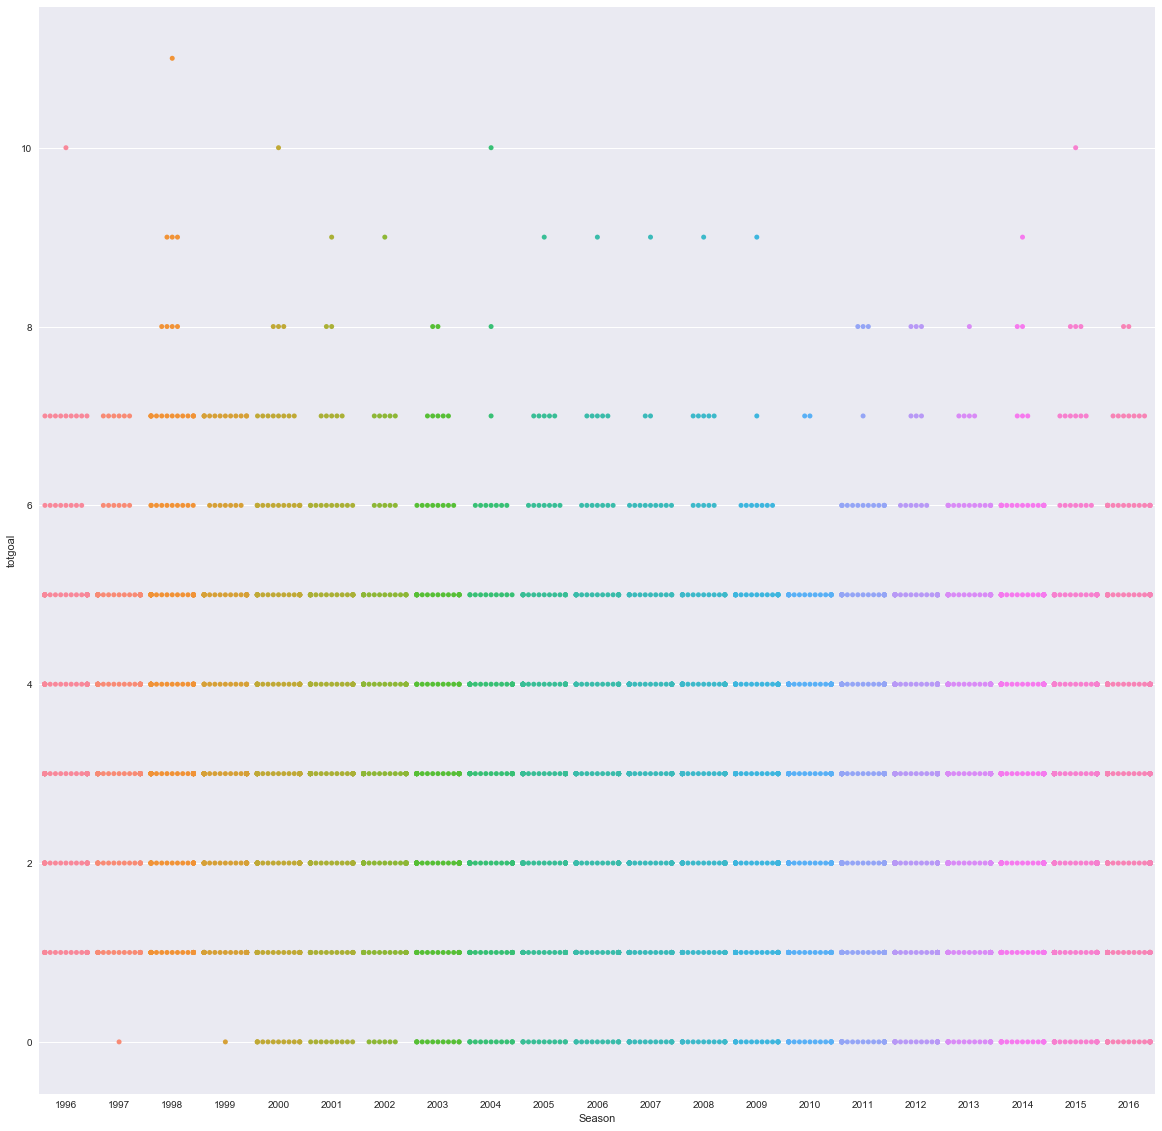

In [28]:
sns.swarmplot(x = 'Season', y = 'totgoal', data = data)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [29]:
reg_data = data[data['round']=='regular']

In [36]:
teamrecords = defaultdict(lambda: defaultdict(int))
for index, row in reg_data.iterrows():
    hgoal = row['hgoal']
    vgoal = row['vgoal']
    hteam = row['home']
    vteam = row['visitor']
    if (hgoal > vgoal):
        teamrecords[hteam]['W'] += 1
        teamrecords[vteam]['L'] += 1
    elif (hgoal < vgoal):
        teamrecords[hteam]['L'] += 1
        teamrecords[vteam]['W'] += 1
    else:
        teamrecords[hteam]['T'] += 1
        teamrecords[vteam]['T'] += 1
        
        

In [49]:
alltimerecordsreg = pd.DataFrame.from_dict(teamrecords,
                                           orient = 'index')

In [68]:
alltimerecordsreg['PTS'] = alltimerecordsreg['W']*3 + alltimerecordsreg['T']
alltimerecordsreg['GP'] = alltimerecordsreg['W'] + alltimerecordsreg['L'] + alltimerecordsreg['T']
alltimerecordsreg['PPG'] = alltimerecordsreg['PTS']/alltimerecordsreg['GP']

In [71]:
alltimerecordsreg = alltimerecordsreg[['GP','W','L','T','PTS', 'PPG']]
alltimerecordsreg = alltimerecordsreg.sort_values('PPG', ascending = False)

In [72]:
alltimerecordsreg

,GP,W,L,T,PTS,PPG
Seattle Sounders,264,123,81,60,429,1.625000
LA Galaxy,662,307,216,139,1060,1.601208
Miami Fusion,122,56,56,10,178,1.459016
FC Dallas,662,278,256,128,962,1.453172
DC United,662,275,260,127,952,1.438066
Sporting Kansas City,663,270,253,140,950,1.432881
Chicago Fire,599,237,217,145,856,1.429048
Columbus Crew,662,270,257,135,945,1.427492
New York Red Bulls,662,266,262,134,932,1.407855
Houston Dynamo,356,130,118,108,498,1.398876
